# CHAPTER 08 스마트 마이닝과 머신러닝

## 2. 머신러닝 기반 광석 분류 실습

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import set_option
set_option("display.max_rows", 10)

#### 데이터 불러오기

In [2]:
training_data = pd.read_csv('Data/PXRF_Rock_Classification.csv')
training_data

,MgO,Al2O3,SiO2,P2O5,S,Cl,K2O,CaO,TiO2,V,...,Y,Zr,Mo,Ag,Sn,Ba,W,Hg,Pb,Classification
0,5.501100,0.000000,0.000000,0.417175,0.000000,0.086050,0.000000,66.174175,0.020750,0.00245,...,0.000000,0.003625,0.000000,0.005050,0.000000,0.0,0.000000,0.000000,0.00000,marble
1,1.340325,0.000000,0.000000,0.497300,0.000000,0.065125,0.000000,72.199650,0.013250,0.00000,...,0.000000,0.004525,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,marble
2,1.100750,0.000000,0.000000,0.472450,0.000000,0.044250,0.000000,70.864350,0.041900,0.00000,...,0.000400,0.004650,0.000000,0.004975,0.000000,0.0,0.000000,0.000000,0.00000,marble
3,0.562550,0.000000,0.000000,0.558950,0.000000,0.125375,0.000000,72.086150,0.032875,0.00000,...,0.000375,0.004025,0.000975,0.020500,0.000000,0.0,0.000000,0.000000,0.00000,marble
4,0.000000,0.000000,0.000000,0.480175,0.000000,0.042525,0.000000,68.769800,0.012825,0.00000,...,0.000000,0.004275,0.000925,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,marble
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0.000000,0.694577,65.929438,0.268503,0.046637,0.000000,0.045098,19.519139,0.000000,0.00000,...,0.000000,0.000724,0.001087,0.000000,0.006792,0.0,0.028797,0.000000,0.00000,intrusive rock
259,0.000000,0.000000,62.265500,0.308200,0.021600,0.000000,0.000000,17.344800,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.032000,0.0,0.050400,0.000000,0.00000,intrusive rock
260,0.000000,1.084704,33.840170,0.250212,6.013921,0.000000,0.039548,25.413335,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.006413,0.057913,0.0,0.042366,0.008745,0.01409,ore
261,0.000000,0.000000,20.827500,0.182200,1.625400,0.000000,0.000000,18.661600,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.081000,0.0,0.027600,0.000000,0.00340,ore


#### 클래스 정수 변환

In [3]:
label_indices = ['marble', 'limestone', 'altered limestone', 'dolomite', 'intrusive rock', 'ore ']
for index, face in enumerate(label_indices):
    training_data.replace(face, index, inplace=True)

#### 훈련/검증 데이터세트 분리

In [5]:
from sklearn.model_selection import train_test_split
train_set, val_set = train_test_split(training_data, test_size=0.33, stratify=training_data['Classification'],
                                      random_state=4)

In [6]:
train_set['Classification'].value_counts()/len(train_set)

0    0.329545
1    0.267045
2    0.181818
4    0.147727
5    0.039773
3    0.034091
Name: Classification, dtype: float64

In [7]:
val_set['Classification'].value_counts()/len(val_set)

0    0.333333
1    0.264368
2    0.183908
4    0.149425
5    0.034483
3    0.034483
Name: Classification, dtype: float64

In [9]:
X_train = train_set.drop(['Classification'], axis=1).values
y_train = train_set['Classification'].values

X_val = val_set.drop(['Classification'], axis=1).values
y_val = val_set['Classification'].values

#### `MinMaxScaler`와 `SVC`를 이용한 모델링

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

svm_pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('svc',  SVC(kernel="rbf", gamma=0.01, C=1000.0)),
    ])

svm_pipeline.fit(X_train, y_train)
y_pred = svm_pipeline.predict(X_val)
print(accuracy_score(y_val, y_pred))

0.7931034482758621


#### 오차행렬

In [11]:
y_pred = svm_pipeline.predict(X_val)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)

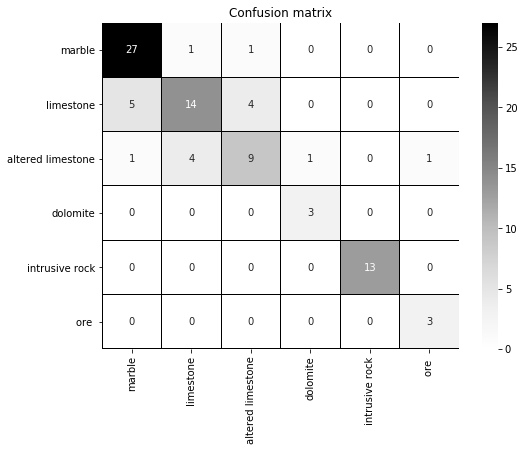

In [12]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm, index = label_indices,
                  columns = label_indices)
plt.figure(figsize = (8,6))
sn.heatmap(df_cm, linecolor='black', linewidths=0.01, cmap='Greys', annot=True)
plt.title('Confusion matrix')
plt.show()

#### 성능 측정

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('class: ', label_indices)
print('Precision: ', precision_score(y_val, y_pred, average=None))
print('Recall   : ', recall_score(y_val, y_pred, average=None))
print('f1_score : ', f1_score(y_val, y_pred, average=None))

class:  ['marble', 'limestone', 'altered limestone', 'dolomite', 'intrusive rock', 'ore ']
Precision:  [0.81818182 0.73684211 0.64285714 0.75       1.         0.75      ]
Recall   :  [0.93103448 0.60869565 0.5625     1.         1.         1.        ]
f1_score :  [0.87096774 0.66666667 0.6        0.85714286 1.         0.85714286]
